## Chapter 8 - Problem 11
***

**11.** This question uses the Caravan data set.

**A.** Create a training set consisting of the first 1,000 observations,
and a test set consisting of the remaining observations.

In [1]:
require(ISLR)
Caravan$Purchase <- ifelse(Caravan$Purchase == "Yes",1,0)
Caravan.train <- Caravan[1:1000,]
Caravan.test <- Caravan[-(1:1000),]

Loading required package: ISLR


[1] 348

**B.** Fit a boosting model to the training set with Purchase as the
response and the other variables as predictors. Use 1,000 trees,
and a shrinkage value of 0.01. Which predictors appear to be
the most important?

Loading required package: gbm
Warning message:
"package 'gbm' was built under R version 3.5.2"Loaded gbm 2.1.4
Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 50: PVRAAUT has no variation."Warning message in gbm.fit(x = x, y = y, offset = offset, distribution = distribution, :
"variable 71: AVRAAUT has no variation."

,var,rel.inf
PPERSAUT,PPERSAUT,14.7513893
MKOOPKLA,MKOOPKLA,8.9786748
MOPLHOOG,MOPLHOOG,7.5899527
MBERMIDD,MBERMIDD,6.2544293
PBRAND,PBRAND,5.4201131
ABRAND,ABRAND,4.5051443
MGODGE,MGODGE,4.4434212
MINK3045,MINK3045,4.0745863
MOSTYPE,MOSTYPE,3.2183438
MSKC,MSKC,2.6545210


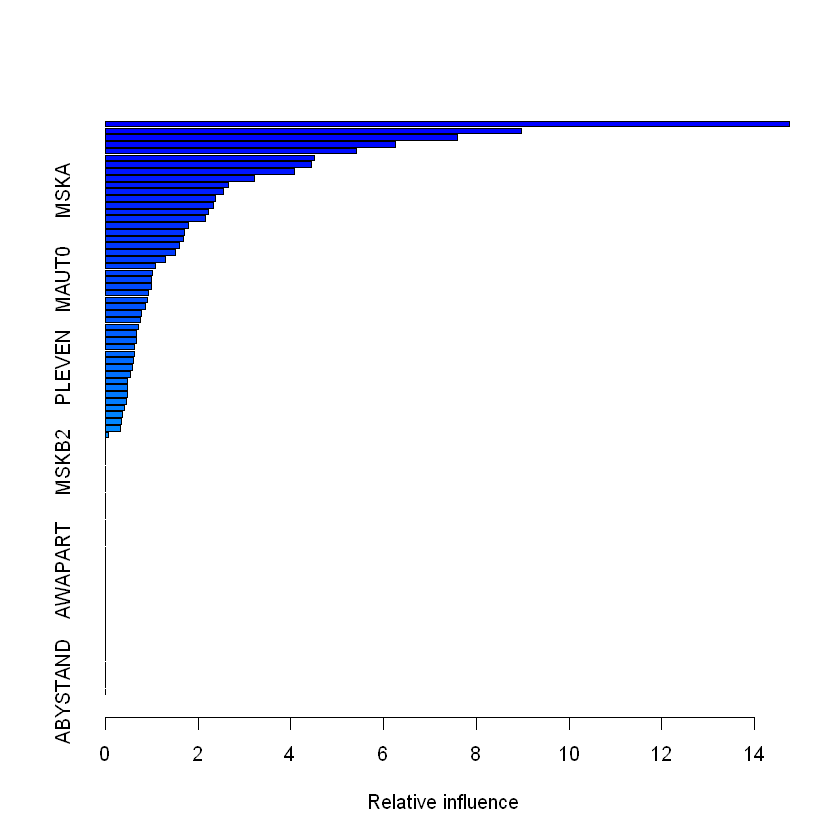

In [2]:
require(gbm)
Caravan.boosting <- gbm(Purchase~.,data = Caravan.train, distribution = "bernoulli", n.trees = 1000,
                   shrinkage = 0.01)
summary(Caravan.boosting)

The most important variables appear to be: <br>
**PPERSAUT:** Contribution car policies <br>
**MKOOPKLA:** Purchasing power class <br>
**MOPLHOOG:** High level education <br>
**MBERMIDD:** Middle management

**C.** Use the boosting model to predict the response on the test data.
Predict that a person will make a purchase if the estimated probability
of purchase is greater than 20 %. Form a confusion matrix.
What fraction of the people predicted to make a purchase
do in fact make one? How does this compare with the results
obtained from applying KNN or logistic regression to this data
set?

In [32]:
Caravan.prob <- predict(Caravan.boosting,newdata = Caravan.test, n.trees = 1000, type = "response")
Caravan.pred <- ifelse(Caravan.prob > 0.2, 1, 0)
with(Caravan.test,table(Caravan.pred,Purchase))

            Purchase
Caravan.pred    0    1
           0 4409  256
           1  124   33

In [33]:
33/(124+33)

[1] 0.2101911

Only 22 % of the predicted people that would make a purchase actually did it.

## KNN 

In [15]:
require(class)

standardized.X <- scale(Caravan [,-86])
train = 1:1000
TestSet <- standardized.X[-train,]
TrainSet <- standardized.X[train,]
TrainY <- Caravan.train$Purchase

knn.pred <- knn(TrainSet,TestSet,TrainY, k = 5) #closest in Euclidean distance
table(knn.pred,Caravan.test$Purchase)

        
knn.pred    0    1
       0 4506  279
       1   27   10

In [16]:
10/(27+10)

[1] 0.2702703

## Logistic Regression

In [28]:
Caravan.log = glm(Purchase ~ ., data = Caravan.train, family = "binomial")
Caravan.prob.log = predict(Caravan.log, Caravan.test, type = "response")
Caravan.pred.log <- ifelse(Caravan.prob.log > 0.4, 1, 0)
with(Caravan.test,table(Caravan.pred.log,Purchase))

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

                Purchase
Caravan.pred.log    0    1
               0 4414  261
               1  119   28

In [29]:
28/(119+28)

[1] 0.1904762

KNN = 27% <br>
Logistic regression = 19%  <br>
Boosting = 20% <br>

The KNN method outperformed both the boosting and the logistic regression at predicting the number of actual purchases. 

The cut-off probability for both logistic regression and the boosting method affect significantly the prediction capacity of the model.